# Homework 1
- Student : Dayana Valentina Gonzalez Vargas 

## Libraries

In [447]:
import matplotlib.pyplot as plt
import numpy as np
import math
import string , random
from random import sample

1. Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: segments do not intersect, segments do intersect
giving the intersection point, and segments do intersect giving an intersection
interval.


### Idea del codigo realizado.
- Para realizar en siguiente codigo, tuve en cuenta el producto cruz desarrollado en clase. Además como cada uno se los puntos dados por el ejercicio son paralelos, donde pueden poser un punto, un segmento en común o ningu de estos. Realice un caso más a los placticado en clase, donde el producto cruz entre todos los diferentes puntos sean cero, así ya que son paralelos puedo encontrar su punto o segmento en común. Ya que, un punto debe estar contenido en el otro segmento, tomado principalmente la seiguiente desigualdad como guia para ver si un segmento contiene a un punto de otro segmento o tienen dos puntos iguales. 

$P_{k} \in \hat{P_{i}P{j}}$ si $d_{k} = 0$
y $min(x_{i},x_{j}) \leqslant x_{k} \leqslant max(x_{i},x_{j}) $,
$min(y_{i},y_{j}) \leqslant y_{k} \leqslant max(y_{i},y_{j}) $

Además, en clase vimos una manera de encontrar los puntos de corte, él cual no funciona muy bien para segmentos paralelos, en donde, decidi tomar la misma desigualdad anterior para ver cual punto era él que se contenia y encontrar el segmento o punto que es la intersección de ambos segmentos.



In [448]:
def Cross_product(P0,P1,P2):
    d = ((P1[0]-P0[0])*(P2[1]-P0[1]))-((P2[0]-P0[0])*(P1[1]-P0[1]))
    return d

In [449]:
# Create class about segments S(x1,y1,x2,y2)
class S:
    def __init__(self, x1,y1, x2,y2 ):
        self.point1 = [x1,y1]
        self.point2 = [x2,y2]

In [450]:
def Cut_point(P1,P2,P3,P4): 
    Pc = [] #Empty List, where i'm going to add the cut points.  
    beta = 0 #Parameter 1
    alpha = 0 #Parameter 2
    det1 = (P3[0]-P4[0])*(P2[1]-P1[1]) 
    det2 = (P2[0]-P1[0])*(P3[1]-P4[1])
    if det1 != det2:
        beta = (1/(det1-det2))*(((P2[1]-P1[1])*(P2[0]-P4[0]))+((P1[0]-P2[0])*(P2[1]-P4[1])))
        alpha = (1/(det1-det2))*(((P4[1]-P3[1])*(P2[0]-P4[0]))+((P3[0]-P4[0])*(P2[1]-P4[1])))
        Pc1 = alpha*P1[0]+(1-alpha)*P2[0]
        Pc2 = alpha*P1[1]+(1-alpha)*P2[1]
        Pc = [Pc1,Pc2]
        print(Pc1)
    elif ( P1 == P3):
        Pc = P1
    elif ( P2 == P3):
        Pc = P2
    elif ( P1 == P4):
        Pc = P1
    elif ( P2 == P4):
        Pc = P2
    elif (min(P3[0],P4[0])<=P2[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
        print("Contienen el punto", P2)
        Pc = str(min(P2,P3))+ ' a ' + str(max(P2,P3))
    elif (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P1[1]<=max(P3[1],P4[1])):
        print("Contienen el punto", P1)
        Pc = str(min(P1,P3))+ ' a ' + str(max(P1,P3))
    elif (min(P2[0],P1[0])<=P3[0]<=max(P2[0],P1[0]))and (min(P2[1],P1[1])<=P3[1]<=max(P2[1],P1[1])):
        print("Contienen el punto", P3)
        Pc = str(min(P2,P3))+ ' a ' + str(max(P2,P3))
    elif (min(P2[0],P1[0])<=P4[0]<=max(P2[0],P1[0]))and (min(P2[1],P1[1])<=P4[1]<=max(P2[1],P1[1])):
        print("Contienen el punto", P4)
        Pc = str(min(P2,P4))+ ' a ' + str(max(P2,P4))
    else:
        print("Son segmentos paralelos no tendrían puntos de corte")
    
    return Pc

In [451]:
def Intersec_segments(P1,P2,P3, P4):
    # Recordatorio dk hace referencia a que el pk es el origen que va para pi y pj
    d1 = Cross_product(P1,P4,P3)
    d2 = Cross_product(P2,P4,P3)
    d3 = Cross_product(P3,P2,P1)
    d4 = Cross_product(P4,P2,P1)
    # Asignar una variable True o False para ver si se cruzan o no.
    c = False
    # Condiciones para saber si se cruzan o no los segmentos
    if (d1*d2)<0 and (d4*d3)<0:
        c = True
        print("Los dos segmentos SE CRUZAN")
    elif (d1*d2)>0 and (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<0 and d4==0:
        if (min(P1[0],P2[0])<=P4[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P4[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<0 and d3==0:
        if (min(P1[0],P2[0])<=P3[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P3[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<0 and d2==0:
        if (min(P3[0],P4[0])<=P2[0]<=max(P4[0],P3[0]))and (min(P4[1],P3[1])<=P2[1]<=max(P4[1],P3[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<0 and d1==0:
        if (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d1 == 0) and (d2 == 0) and (d3 == 0) and (d4 == 0):
        if (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZA1N y tienen puntos en comun")
        elif (min(P3[0],P4[0])<=P2[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZAN y tienen puntos en comun")
        elif (min(P1[0],P2[0])<=P3[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P3[1]<=max(P1[1],P1[1])):
            c = True
            print("Los dos segmentos SE CRUZAN y tienen puntos en comun")
        elif (min(P1[0],P1[0])<=P4[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P4[1]<=max(P1[1],P3[1])):
            c = True
            print("Los dos segmentos SE CRUZAN y tienen puntos en comun")
        else:
            c = False
            print("No se cruzan pero son paralelos")
    
    elif (d1*d2)>0 and d4==0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    else:
        print("No esta el caso")
    
    #Evalua puntos de corte
    if c == True:
        Pc = Cut_point(P1,P2,P3,P4)
        print('La intersección se encuentra en:', Pc)
    else:
        Pc = 0
    return c

In [452]:
def graphic_segments(P1,P2,P3,P4):
    P1x,P1y = [P1[0],P2[0]],[P1[1],P2[1]] 
    P2x,P2y = [P3[0],P4[0]],[P3[1],P4[1]] 
    
    plt.clf()
    plt.plot(P1[0],P1[1],"ro")
    plt.plot(P2[0],P2[1],"ro")
    plt.plot(P3[0],P3[1],"ro")
    plt.plot(P4[0],P4[1],"ro")
    plt.plot(P1x,P1y)
    plt.plot(P2x,P2y)
    plt.annotate("P1", (P1[0],P1[1]),(P1[0] + 0.01, P1[1]))
    plt.annotate("P2", (P2[0],P2[1]),(P2[0] + 0.01, P2[1]))
    plt.annotate("P3", (P3[0],P3[1]),(P3[0] + 0.01, P3[1]))
    plt.annotate("P4", (P4[0],P4[1]),(P4[0] + 0.01, P4[1]))
    plt.show()

In [453]:
#Main and result
# List the segments
S1 = S(1,2,3,4)
S2 = S(3,4,5,6)
S3 = S(2,3,5,6)
print(S2.point1)
S4 = S(4,5,5,6)

[3, 4]


### Intersection of S1 with S2

Los dos segmentos SE CRUZAN y tienen puntos en comun
La intersección se encuentra en: [3, 4]


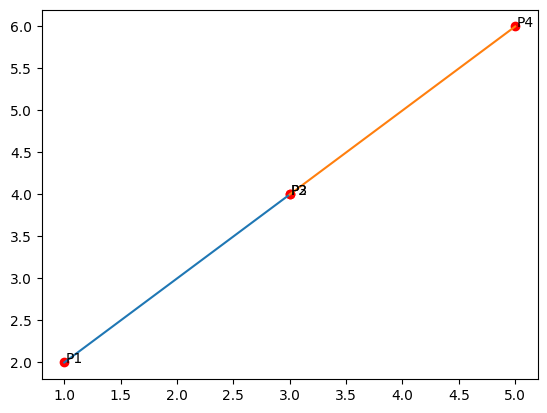

In [454]:
Intersec_segments(S1.point1,S1.point2,S2.point1,S2.point2)
graphic_segments(S1.point1,S1.point2,S2.point1,S2.point2)

### Intersection of S1 with S3

Los dos segmentos SE CRUZAN y tienen puntos en comun
Contienen el punto [3, 4]
La intersección se encuentra en: [2, 3] a [3, 4]


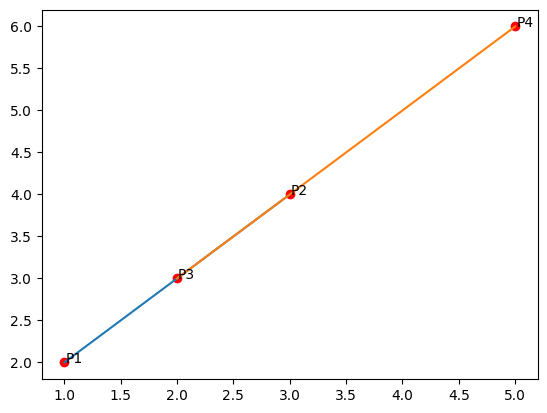

In [455]:
Intersec_segments(S1.point1,S1.point2,S3.point1,S3.point2)
graphic_segments(S1.point1,S1.point2,S3.point1,S3.point2)

### Intersection of S1 with S4

No se cruzan pero son paralelos


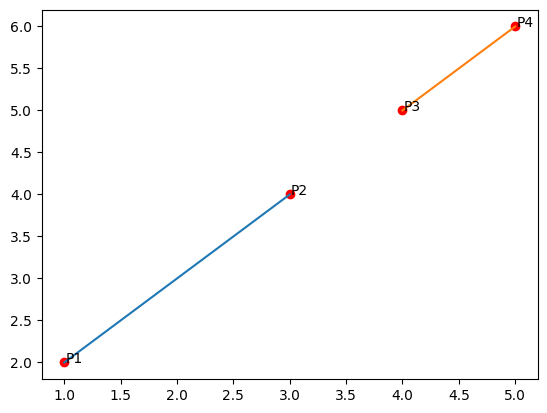

In [456]:
Intersec_segments(S1.point1,S1.point2,S4.point1,S4.point2)
graphic_segments(S1.point1,S1.point2,S4.point1,S4.point2)

2. Search for the divide and conquer algorithm for the construction of the
convex hull of a set of points.

2.1 Implement the algorithm for the points in the attached file (points ch.txt). Illustrate
the process with plots.

## Partición del conjunto en dos mini conjuntos

In [457]:
# primero: Organizar el arreglo de puntos en forma acsdente x-coordenada
def Sort_array(P):
    New_array = []
    for i in range(len(P)):
        New_array.append([P[i][0], P[i][1]])
    x_coor = lambda New_array: New_array[0]
    New_array.sort(key = x_coor)   
    return New_array 


In [458]:
#Segundo: Dividimos los puntos en dos conjuntos S1 son los puntos más a la izquierda del
#  medio en la cordenada X.
# Y S2 los puntos más a la derecha de la medio en la coordenada X.
def divide_halves(P):
    S1 = []
    S2 = []
    mid = int(len(P)/2)
    S1 = P[:mid]
    S2 = P[mid:]
    return S1,S2


### Codigo Convex Hull

In [459]:
#Angulo con la pendiente
def ang2(x0,y0,xn,yn):
    m1 = yn-y0
    m2 = xn-x0
    theta = np.arctan2(m1,m2)
    return(theta)

In [460]:
def dist(x0,y0,x1,y1):
    di = np.sqrt((x1-x0)^2 + (y1-y0)^2)
    return di 

In [461]:
def grafic_hull(S1,P01,x,y,N1):
    xcor1 = []
    ycor1 = []

    for n in range (len(S1)):
        xcor1.append(S1[n][0])
        ycor1.append(S1[n][1])
    
    
    plt.scatter(x,y)
    plt.plot(P01[0],P01[1], "ro")
    for n in range(N1):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (S1[n][0], S1[n][1]), xytext=(S1[n][0], S1[n][1]))
    plt.plot(xcor1,ycor1)
    plt.show()

In [462]:
def grafic_hull_divide(S1,S2,P01,P02,x,y,N1,N2):
    xcor1 = []
    ycor1 = []
    xcor2 = []
    ycor2 = []


    for n in range (len(S1)):
        xcor1.append(S1[n][0])
        ycor1.append(S1[n][1])

    for n in range (len(S2)):
        xcor2.append(S2[n][0])
        ycor2.append(S2[n][1])
    
    
    plt.scatter(x,y)
    plt.plot(P01[0],P01[1], "ro")
    for n in range(N1):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (S1[n][0], S1[n][1]), xytext=(S1[n][0], S1[n][1]))
    plt.plot(xcor1,ycor1)

    plt.plot(P02[0],P02[1], "ro")
    for n in range(N2):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (S2[n][0], S2[n][1]), xytext=(S2[n][0], S2[n][1]))
    plt.plot(xcor2,ycor2)

    plt.show()

In [463]:
def angles_sort(P0,P_new):
    a = [] #Lista de punto con su respectivo angulo
    angles=[] #lista de angulos
    for n in P_new:
        m = ang2(P0[0],P0[1],n[0],n[1])
        if m is angles:
            # Revisar que si tienen el mismo angulo escoger el de la mayor distancia
            index = angles.index(m)
            p_prev = P_new[index]
            d1 = dist(P0[0],P0[1],n[0],n[1])
            d2 = dist(P0[0],P0[1],p_prev[0],p_prev[1])
            if d1 > d2:
                a[index]=[n[0],n[1],m]
        else:
            a.append([n[0],n[1],m])
            angles.append(m)


    # 3.Debemos ordenar con respecto al angulo la lista
    angulo = lambda a:a[2]
    a.sort(key=angulo) #Organizado
    #print(a)
    #Vamos a revisar si encontramos dos puntos con la misma pendiente para tomar el que tenga 
    # la distancia más larga.
    # 4. Agrupo los puntos en una pila con el orden anterior
    p_sort_pila = []
    for k in a:
        p_sort_pila.append([k[0],k[1]])
    return p_sort_pila

In [464]:
def Algoritmo_Graham(X,Y,P):
    #Notemos que el arreglo ya entra organizado por la coordenada X, ya que en los puntos anteriores
    #Partimos por la coordenada X, ordenada de forma ascendente
    P0 = P[0]
    #print("Punto de partida:",P0)

    #Quitamos el P0 de P creando así P nuevo
    P_new =[]
    for i in range(len(P)):
        if np.all(P[i] != P0):
            P_new.append(P[i])

    #print(P_new)

    #2. Calculo las pendientes de P0 -> Pi 
    p_sort_pila = angles_sort(P0,P_new)
    #print(p_sort_pila)
    #5. Definimos el arreglo S que es el conjunto con los vertices del poligono
    S = []
    #6. Agegamos P0, P1, y P2 en la pila 
    S.append(P0)
    S.append(p_sort_pila[0])
    S.append(p_sort_pila[1])
    #print(S)
    #print(p_sort_pila)
    #8. Reviso que todos vayan para la izquierda desde i = 3
    #g = False #Suponiendo que da vuelta a la izquierda
    for i in range(2,len(p_sort_pila)):
        grafic_hull(S,P0,X,Y,len(S))
        S.append(p_sort_pila[i])
        d = Cross_product(S[-3],S[-2],S[-1])
        while(d <= 0):
            S.pop(-2) #Elimino el penultimo de S 
            d = Cross_product(S[-3],S[-2],S[-1])
    #Por ultimo agregamos P0 otra vez   
    S.append(P0)
    #print(S)
    return S, P0


In [465]:
def Algoritmo_Graham_Verificar(X,Y,P):
    #Notemos que el arreglo ya entra organizado por la coordenada X, ya que en los puntos anteriores
    #Partimos por la coordenada X, ordenada de forma ascendente
    P0 = P[0]
    #print("Punto de partida:",P0)

    #Quitamos el P0 de P creando así P nuevo
    P_new =[]
    for i in range(len(P)):
        if np.all(P[i] != P0):
            P_new.append(P[i])

    #print(P_new)

    #2. Calculo las pendientes de P0 -> Pi 
    p_sort_pila = angles_sort(P0,P_new)
    #print(p_sort_pila)
    #5. Definimos el arreglo S que es el conjunto con los vertices del poligono
    S = []
    #6. Agegamos P0, P1, y P2 en la pila 
    S.append(P0)
    S.append(p_sort_pila[0])
    S.append(p_sort_pila[1])
    #print(S)
    #print(p_sort_pila)
    #8. Reviso que todos vayan para la izquierda desde i = 3
    #g = False #Suponiendo que da vuelta a la izquierda
    for i in range(2,len(p_sort_pila)):
        #grafic_hull(S,P0,X,Y,len(S))
        S.append(p_sort_pila[i])
        d = Cross_product(S[-3],S[-2],S[-1])
        while(d <= 0):
            S.pop(-2) #Elimino el penultimo de S 
            d = Cross_product(S[-3],S[-2],S[-1])
    #Por ultimo agregamos P0 otra vez   
    S.append(P0)
    #print(S)
    return S

## Parte de unir los dos convex hull

In [466]:
# Para ver la Orientación entre los segmentos.
def orientation(P0,P1,P2):
    d = Cross_product(P0, P1, P2)
    if d > 0: # Giro en sentido anti-horario
        return 1
    elif d == 0: # Paralelos
        return 0
    else:  # Giro en sentido horario
        return -1


In [467]:
def find_upper_tanget(i_1,i_2,S1,S2):
    # Ya que encontramos los indices vamos a encontrar L1 que es la primera recta tangente, luego viendo 
    #La orientación vamos a encontrar la tangente superior L5 la cual va a ser como vamos a unir
    # Ambos convex hull S1 y S2
    Done = False
    while(Done != True):
        Done = False
        #print('argumentos', 'A',S1[i_1],'B',S2[i_2],'C',S2[i_2-1])
        while(orientation(S1[i_1],S2[i_2],S2[i_2-1]) >= 0):
            i_2= i_2 - 1
            #print('A',S1[i_1])
            #print('B+1',S2[i_2], i_2)
        while(orientation(S2[i_2],S1[i_1],S1[i_1+1]) <= 0):
              i_1 = i_1+1 
              #print(S1[i_1])
              #print(S2[i_2])
              Done = True
        #    break
        #Done = True
            
    #print(S1[i_1])
    #print(S2[i_2])
    return S1[i_1], S2[i_2]

In [468]:
def find_lower_tanget(i_1,i_2,S1,S2):
    Done = False
    while(Done != True):
        Done = False
        #print('argumentos', 'A',S1[i_1],'B',S2[i_2],'C',S2[i_2+1])
        while(orientation(S1[i_1],S2[i_2],S2[i_2+1]) <= 0):
            i_2= i_2 + 1
            #print('A',S1[i_1])
            #print('B+1',S2[i_2], i_2)
        while(orientation(S2[i_2],S1[i_1],S1[i_1-1]) >= 0):
              i_1 = i_1-1 
              #print(S1[i_1])
              #print(S2[i_2])
              Done = True
        #    break
        #Done = True
            
    #print(S1[i_1])
    #print(S2[i_2])
    return S1[i_1], S2[i_2]

In [469]:
def quick_hull(P):
    X = []
    Y = []
    #Separaremos los puntos de P en X y Y
    for n in range(len(P)):
        X.append(P[n][0])
        Y.append(P[n][1])
    #1. Organice el arreglo por la coordenada x
    K = Sort_array(P)
    # 2. Luego, divide ese arreglo en la mitad, para tomar dos subconjuntos del arreglo
    K1,K2 = divide_halves(K)
    # 3. A cada una de esas mitades realizamos el codigo de graham.
    print('Paso a Paso, convex hull lado Izquiedo:')
    S1,P01 = Algoritmo_Graham(X,Y,K1)
    print('Paso a Paso, convex hull lado Derecho:')
    S2,P02= Algoritmo_Graham(X,Y,K2)
    n1 = len(S1)
    n2 = len(S2)
    #Graficamos
    print('Resultado con dos convex hull:')
    grafic_hull_divide(S1,S2,P01,P02,X,Y,n1,n2)
    #------------------------------------------------------------------
    ## ESTA PARTE ES PARA UNIR AMBOS CONVEX YA ENCONTRADOS
    # primero debemos encontra el punto en S1 que esta más a la derecha y
    # El punto en S2 que esta más a la izquierda.
    # Y debemos guardar sus indices
    i_1 = 0 #Va a guardar el indice del punto en S1 más a la derecha
    i_2 = 0 #Va a guardar el indice del punto en S2 más a la Izquierda
    for i in range(n1):
        if S1[i][0] > S1[i_1][0]:
            S1[i][0]
            i_1 = i
    
    for i in range(n2):
        if S2[i][0] <  S2[i_2][0]:
            S2[i][0]
            i_2 = i
    # Encontramos la tangente superior de cada uno de los convex        
    u1,u2 = find_upper_tanget(i_1,i_2,S1,S2)
    # Encontramos las tangentes inferiores de cada uno de los convex
    l1,l2 = find_lower_tanget(i_1,i_2,S1,S2)
    # Eliminamos los P0 repetidos en cada uno de los convex
    S1.pop(-1)
    S2.pop(0)
    # Elimino los puntos que ya no me interesan para pegar ambos convex,
    #  teniendo en cuenta 
    # Los puntos que conforman las tangentes inferiores y superiores.
    index_u1 = S1.index(u1)
    index_l1 = S1.index(l1)
    S1_left = S1[:index_l1+1]
    S1_right = S1[index_u1:]
    
    #print('LeftS1:',S1_left)
    #print('RightS1:',S1_right)

    index_u2 = S2.index(u2)
    index_l2 = S2.index(l2)
    S2_left = S2[index_l2:index_u2+1]

    #print('LeftS2:',S2_left)
    #print('RightS2:',S2_right)
    S_new = S1_left+S2_left+S1_right
    S_new.append(S_new[0])
    SS= Algoritmo_Graham_Verificar(X,Y,S_new)
    #Verificación que S_new cumpla

    print('Convex hull final:')
    grafic_hull(SS,SS[0], X, Y, len(SS))
        


     

In [470]:
#P = np.round(np.random.rand(20,2),4)
#P = [[1,2],[2,1],[3,2],[4,2],[1,4],[4,4],[6,4],[7,3],[3,4]]
P = [[4.4761, 1.994],[4.9466, 1.2667], [0.1991, 3.0293], [1.2734, 4.9885], [1.9589, 3.6342], [3.7172, 3.6357], [4.0876, 0.2972], [4.304, 2.2281], [3.2383, 3.0908], [3.1682, 3.7495], [0.7345, 4.7487], [3.968, 3.5959], [1.2508, 0.1982], [0.1991, 2.256], [0.1991, 1.562], [2.134, 1.562], [3.334, 1.562]]

Paso a Paso, convex hull lado Izquiedo:


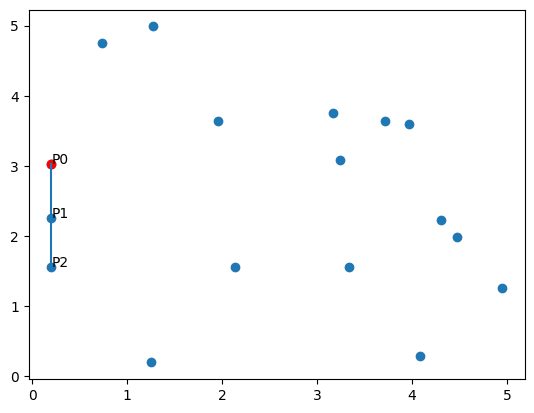

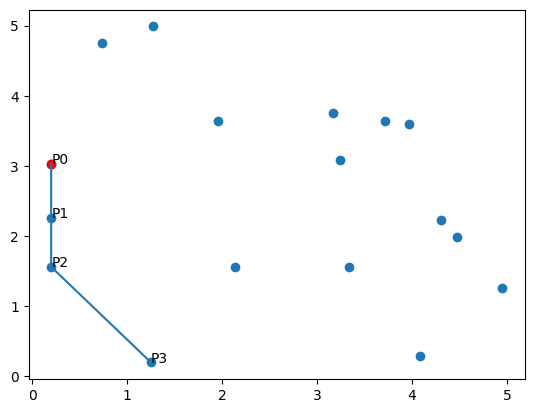

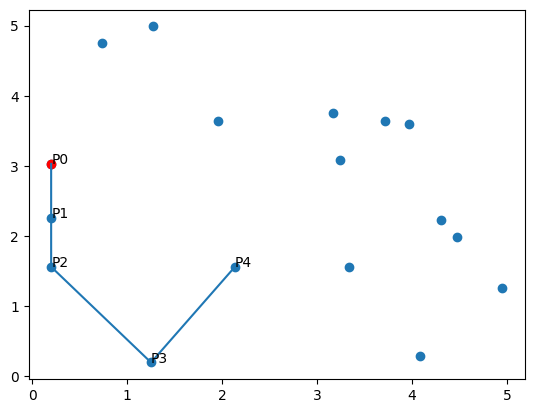

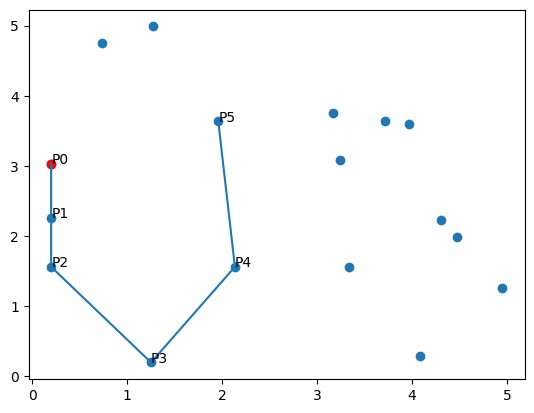

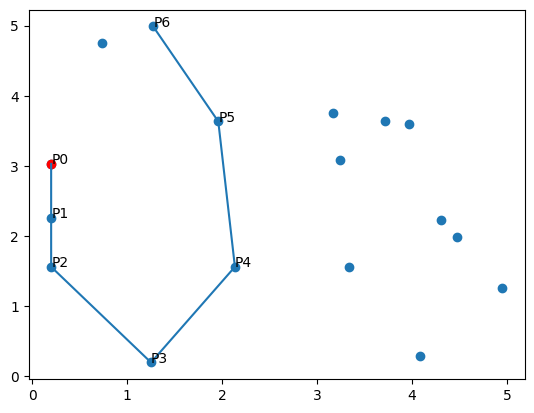

Paso a Paso, convex hull lado Derecho:


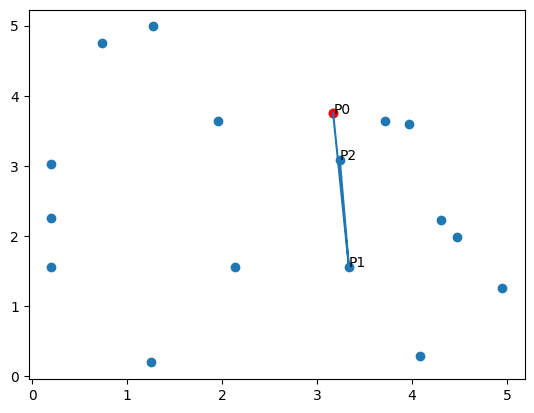

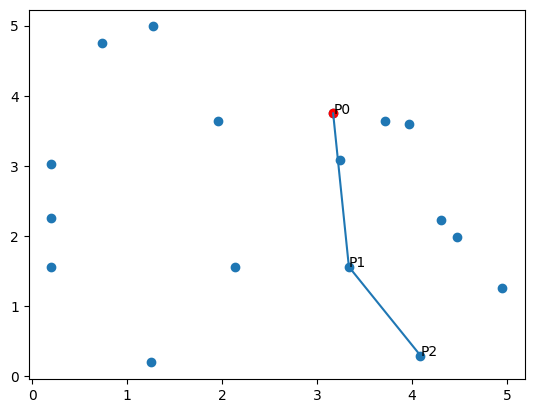

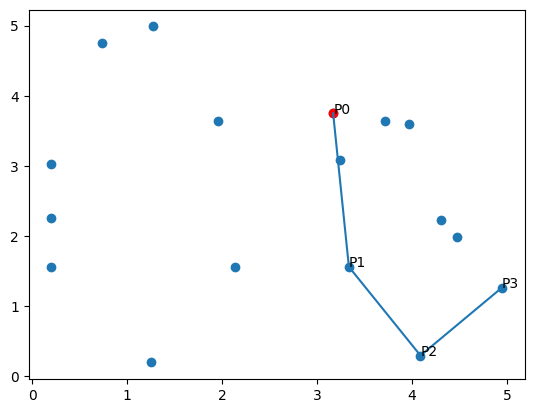

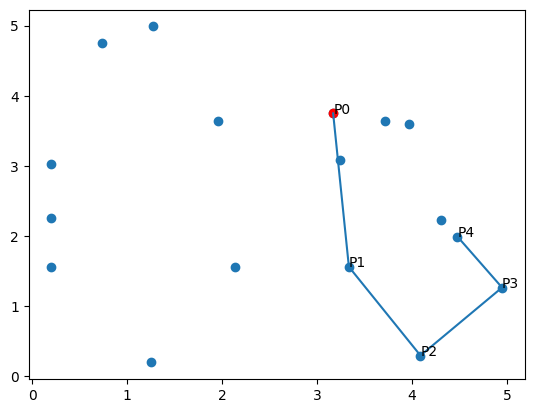

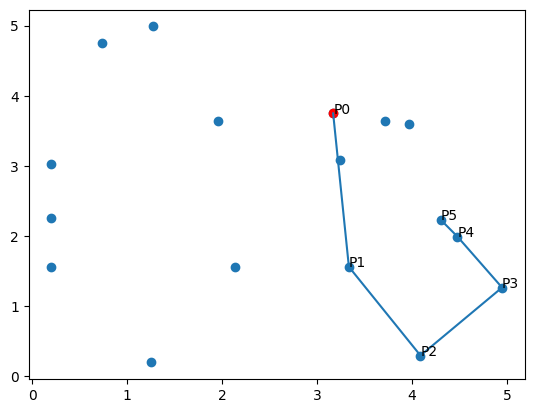

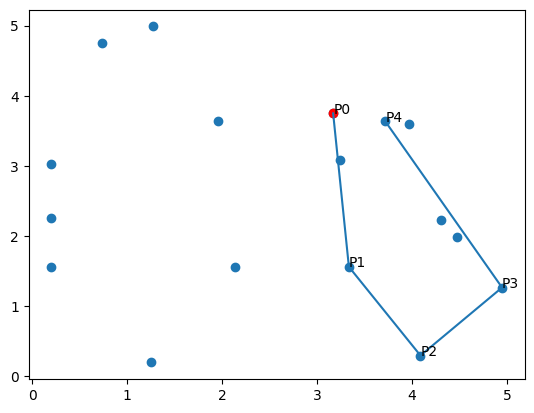

Resultado con dos convex hull:


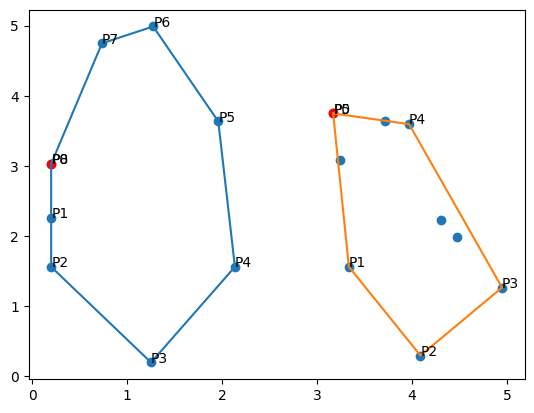

Convex hull final:


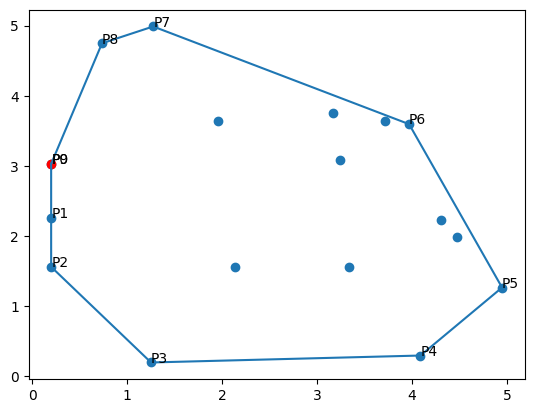

In [471]:
quick_hull(P)

2.2 Which models could be implemented by the convex hull algorithm? Which systems
could be described by the model? In those cases, what do represent the points and
the hull?

- El algoritmo de *Convex Hull* tiene diversas y muy útiles aplicación, podemos observar diversos modelos que tengan en cuenta un conjunto de puntos o parámetros, los cuales se requiera una optimización, por ejemplo:
 podemos implementar este algoritmo en el procesamiento de imágenes, para detectar alguna deformidad ejemplo: cáncer, o quistes para validar el tamaño de estos o agruparlos. Otra, posible aplicación o un modelo que se puede realizar con el algoritmo *Convex Hull*, podría ser un sistema geográfico y reconocimiento de patrones. Un ejemplo más significativo es en el campo de la meteorología, los expertos utilizan el algoritmo de *Convex Hull* para determinar los sectores en el que ha llovido, donde cada punto podría representar un lugar, y al hacer el algoritmo podrías identificar el área en el que podemos identificar que ha llovido.


## Nota:
Este punto tuvo como apoyo las siguientes referencias:

[1]. Sharma, P. (2018, 2 julio). Divide and Conquer algorithm to find Convex Hull. OpenGenus IQ: Computing Expertise & Legacy. https://iq.opengenus.org/divide-and-conquer-convex-hull/

[2].GeeksforGeeks. (2022, 22 junio). Convex Hull using Divide and Conquer Algorithm. https://www.geeksforgeeks.org/convex-hull-using-divide-and-conquer-algorithm/



3. Implement the sweep line algorithm and apply it to a set of 20 randomly
generated segments to identify intersection points and intersecting segments.

### Vamos a realizar una clase segmento, en donde se termine el inicio y el final del segmento.

In [472]:
class point_:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.tag = None
        self.tag_seg = None
        


In [473]:
#1 -> up
#0 -> down
class segmento:
    def __init__(self,p,q,s):
        self.seg_tag = s #Guarda el nombre del segmento al que pertenece
        p.tag_seg = s
        q.tag_seg = s
        if p.y > q.y:
            self.start = p
            p.tag = 1
            self.end = q
            q.tag = 0
        elif p.y == q.y:
            if p.x < q.x:
                self.start = p
                p.tag = 1
                self.end = q
                q.tag = 0
            else:
                self.start = q
                q.tag = 1
                self.end = p
                p.tag = 0
        else:
            self.start = q
            q.tag = 1
            self.end = p
            p.tag = 0

# SWEEP LINE
- Entra: un conjunto de segmentos en los cuales se quiere determinar sus intersecciónes.
- Salida: Conjunto de intersecciones 

### Inicialmente defino un arbol, el cual se va a dedicar a organizar la COLA DE EVENTOS según la relación de Orden ≺.
- Debe ordenar los eventos de acuerdo a ≺.
- Debe tener un mecanismo para eliminar el primer elemento y permitir su manipulación en el estado de la linea de barrido.
- Pder recibir nuevos puntos.

## Relación de orden ≺
Dados dos puntos $P$ y $Q$ en $R^{2}$ se tiene que 
- $P < Q$  sii las coordenadas $P_{y} > Q_{y}$ ó $(P_{y} = Q_{y} $ y $P_{x} < Q_{x})$

In [474]:
class queue_Events:
    def __init__(self,punto,s):
        self.pointx = punto.x
        self.point = punto
        self.segmento = s
        self.left = None
        self.right = None
    
def Insert_Sort_Event(raiz,punto):
    if(raiz.point.y < punto.point.y):
        if raiz.left is None:
            raiz.left = punto
        else:
            Insert_Sort_Event(raiz.left,punto)
    elif(raiz.point.y == punto.point.y):
        if(raiz.point.x > punto.point.x):
            if raiz.left is None:
                raiz.left = punto
            else:
                Insert_Sort_Event(raiz.left,punto)
        else:
            if raiz.right is None:
                raiz.right = punto
            else:
                Insert_Sort_Event(raiz.right,punto)
    else:
        if raiz.right is None:
                raiz.right = punto
        else:
            Insert_Sort_Event(raiz.right,punto)

Tambien, Realice el inorder para organizer el arreglo de Izquierda, Raiz y derecha, así obteniendo el arreglo ordenado.

In [475]:
#Usaremos inoder para leer los datos de Izquierda,Raiz y Derecha
def inorder_queue(root):
    inorderArr = []
    if root.left is not None:
        leftInorderArr = inorder_queue(root.left)
        inorderArr.extend(leftInorderArr) #Toma el arreglo y los agrega como elementos y no un arreglo de arreglos
    
    inorderArr.append(root)
    if root.right is not None:
        rightInorderArr = inorder_queue(root.right)
        inorderArr.extend(rightInorderArr) #Toma el arreglo y los agrega como elementos y no un arreglo de arreglos
    
    return inorderArr

## Cruce de un segmento con la linea de barrido.

In [476]:
# Encontrar el intersecto donde se cruza la linea de barrido y el segmento.
def Croos_line(y0, S):
    Pc = []
    Alpha = (y0 - S[1].y)/ (S[0].y-S[1].y)
    x = (Alpha* S[0].x)+((1-Alpha)*S[1].x)
    Pc = [x,y0]
    return Pc

Segundo, implemente el arbol para que fuera EL ESTADO DE LA LINEA DE BARRIDO
- El estado de barrido se refiere a los puntos que interseccionan con la linea de barrido.
- Este arbol se organiza según la coordenada x
- Añadi un nuevo parametro el cual fueran las hojas y tener en cuenta los nodos(Lo cual es lo que ya hemos trabajado en clase).

- *Nodo*: Tengo información para guiar procesos de busqueda.
- *Hojas*: Segmentos que cruzan la linea de barrido.

# Algoritmo de intersecciones

In [480]:
def remove_line(l_active, evento):
    l = l_active.copy()
    for i in l:
        #print(evento.point.tag_seg)
        if i[2]== evento.point.tag_seg:
            #print(i)
            idex = l.index(i)
            l_active.pop(idex)
    return l_active

In [481]:
#Ingresamos el evento y la lista de rectas
#Salir la lista de rectas activadas que estan cruzando la linea de barrido
def add_events(evento,l_active):
    #print(evento.point.tag)
    if evento.point.tag == 1:
        l_active.append([[evento.segmento[0].x,evento.segmento[0].y,evento.point.tag],[evento.segmento[1].x,evento.segmento[1].y,evento.point.tag],evento.point.tag_seg,False])
    elif evento.point.tag == 0:
        l_active = remove_line(l_active,evento)
    print(l_active)
    return l_active
        


In [482]:
def handle_line_active(la,r1,r2,intersec):
    r1_index = la.index(r1)
    r2_index = la.index(r2)
    #print(la)
    a = False
    for i in intersec:
        if (i[3] == r1[2]+r2[2]) or (i[3] == r2[2]+r1[2]):
            a = True
    if a == False:
        la[r1_index], la[r2_index] = la[r2_index],la[r1_index]
    #print(la)
    return la,a

In [483]:
def find_intersection_line(la,intersec):
    #la_new = []
    for i in range(len(la)-1):
        r1 = la[i]
        r2 = la[i+1]
        print(r1[2])
        print(r2[2])
        if Intersec_segments(r1[0],r1[1],r2[0],r2[1]):
            print(r1[2])
            print(r2[2])
            pc = Cut_point(r1[0],r1[1],r2[0],r2[1])
            la,a= handle_line_active(la,r1,r2,intersec)
            if a == False:
                intersec.append([pc[0],pc[1],2,r1[2]+r2[2]])
        else:
            la = la
    return intersec, la


In [484]:
def h(la):
    pass

In [485]:
def Find_intersection(s):
    #Entra una lista de segmentos, esta lista es de tres componentes [puntox,puntoy,etiqueta,segmento]
    #La etiqueta consta de 
    # 1-> upper
    # 0-> down
    # 2-> intersection
    # Generar la cola
    #print(s)
    Q = [] #Inicializo Q
    #Agrego los elementos a Q
    #L(p): Segmentos cuyos extremos inferiores es p
    #U(p): Segmentos cuyo entorno superioi es p
    root = queue_Events(s[0][0],s[0])
    #print(root.segmento[1].x)
    for i in range(len(s)):
        if i == 0:
            Insert_Sort_Event(root,queue_Events(s[i][1],s[i]))
        else:
            Insert_Sort_Event(root,queue_Events(s[i][0],s[i]))
            Insert_Sort_Event(root,queue_Events(s[i][1],s[i]))
    #Organizo los segmentos de Q 
    Q = inorder_queue(root)
    l = []
    intersec = []
    ins = []
    while (len(Q)>0):
        p = Q[0]
        Q.pop(0)
        l = add_events(p,l)
        if (len(l)>1):
            intersec,l = find_intersection_line(l,intersec)  
    
        
        #print(l)
    #Q.pop(0)
    #l = Lines_actives(Q,p)
    print(intersec)
    return intersec
    


        #I = find_intersection_line(l)
    #print(I)    


40
0.92
Puntos iniciales:
0.92 0.23
0.42 0.88
0.86 0.03
0.63 0.02
0.45 0.13
0.47 0.68
0.99 0.46
0.98 0.69
0.05 0.1
0.73 0.81
0.26 0.61
0.83 0.2
0.17 0.03
0.78 0.13
0.04 0.4
0.7 0.98
0.49 0.49
0.73 0.05
0.24 0.91
0.56 0.36


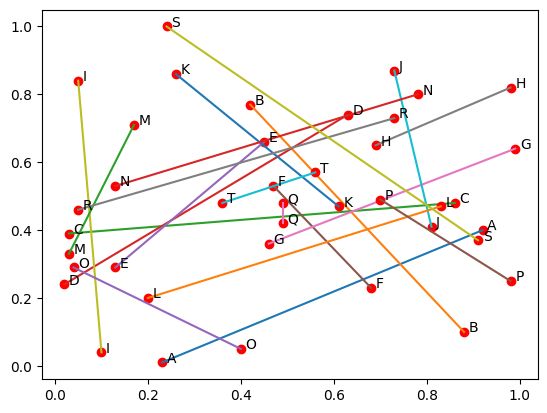

In [486]:
n = 40
X = np.round(np.random.rand(n),2)
Y = np.round(np.random.rand(n),2)
P = []
#Generador de puntos
for i in range(n):
    p = point_(X[i],Y[i])
    P.append(p)
len(P)

seg = []
eti = 'ABCDEFGHIJKLMNOPQRSTWXYZabcdefghijklmnopqrszx'
i = 0 
print(len(P))
#Genero segementos
while(len(P)>0):
    s = segmento(P[0],P[1],eti[i])
    seg.append([s.start,s.end])
    P.pop(0)
    P.pop(0)
    i += 1

print(seg[0][0].x)
print("Puntos iniciales:")

#Grafica de los segmentos    
plt.clf()
for i in range(len(seg)):
    print(seg[i][0].x,seg[i][1].x)
    P1x,P1y = [seg[i][0].x,seg[i][1].x],[seg[i][0].y,seg[i][1].y]
    plt.plot(seg[i][0].x,seg[i][0].y,"ro")
    plt.plot(seg[i][1].x,seg[i][1].y,"ro")
    plt.plot(P1x,P1y)
    plt.annotate(seg[i][0].tag_seg, (seg[i][0].x,seg[i][0].y),(seg[i][0].x + 0.01, seg[i][0].y))
    plt.annotate(seg[i][1].tag_seg, (seg[i][1].x,seg[i][1].y),(seg[i][1].x + 0.01, seg[i][1].y))
plt.show()


#print(P)

In [487]:
Intersection = Find_intersection(seg)

[[[0.24, 1.0, 1], [0.91, 0.37, 1], 'S', False]]
[[[0.24, 1.0, 1], [0.91, 0.37, 1], 'S', False], [[0.73, 0.87, 1], [0.81, 0.41, 1], 'J', False]]
S
J
Los dos segmentos SE CRUZAN
0.7987664856477891
La intersección se encuentra en: [0.7987664856477891, 0.4745927075252133]
S
J
0.7987664856477891
[[[0.73, 0.87, 1], [0.81, 0.41, 1], 'J', False], [[0.24, 1.0, 1], [0.91, 0.37, 1], 'S', False], [[0.26, 0.86, 1], [0.61, 0.47, 1], 'K', False]]
J
S
Los dos segmentos SE CRUZAN
0.798766485647789
La intersección se encuentra en: [0.798766485647789, 0.4745927075252133]
J
S
0.798766485647789
S
K
Los dos segmentos NO SE CRUZAN
[[[0.73, 0.87, 1], [0.81, 0.41, 1], 'J', False], [[0.24, 1.0, 1], [0.91, 0.37, 1], 'S', False], [[0.26, 0.86, 1], [0.61, 0.47, 1], 'K', False], [[0.05, 0.84, 1], [0.1, 0.04, 1], 'I', False]]
J
S
Los dos segmentos SE CRUZAN
0.798766485647789
La intersección se encuentra en: [0.798766485647789, 0.4745927075252133]
J
S
0.798766485647789
S
K
Los dos segmentos NO SE CRUZAN
K
I
Los dos s

26
26


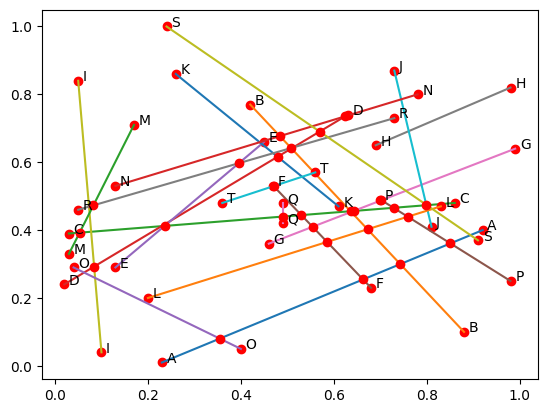

In [488]:
X_int = []
Y_int = []
print(len(Intersection))
for j in Intersection:
    X_int.append(j[0])
    Y_int.append(j[1])
print(len(X_int))
plt.clf()
for i in range(len(seg)):
    P1x,P1y = [seg[i][0].x,seg[i][1].x],[seg[i][0].y,seg[i][1].y]
    plt.plot(seg[i][0].x,seg[i][0].y,"ro")
    plt.plot(seg[i][1].x,seg[i][1].y,"ro")
    plt.plot(P1x,P1y)
    plt.annotate(seg[i][0].tag_seg, (seg[i][0].x,seg[i][0].y),(seg[i][0].x + 0.01, seg[i][0].y))
    plt.annotate(seg[i][1].tag_seg, (seg[i][1].x,seg[i][1].y),(seg[i][1].x + 0.01, seg[i][1].y))
plt.plot(X_int,Y_int,'ro')
plt.show()